## Feature Scaling [WIP]

Deals with normalizing range of features or independent variables of data. In ML, feature scaling is used to 
- ensure features contribute approximately proportionately to the final distance as opposed to one feature dominating; particularly important when euclidean distance is used
- help gradient descent converge faster, thus helping with the optimization problem and speeding up the learning process
- penalize coefficients appropriately when regularization is used as part of the loss function

Source: [Wikipedia](https://en.wikipedia.org/wiki/Feature_scaling)

### Mean normalization

Mean normalization is a method used in normalization. The formula is as follows:

$$
x^{\prime}=\frac{x-\operatorname{average}(x)}{\max (x)-\min (x)}
$$

In [2]:
import torch

x = torch.Tensor([4, 36, 45, 50, 75])
x_prime = (x - x.mean()) / (x.max() - x.min()) 
print(x_prime)

tensor([-0.5352, -0.0845,  0.0423,  0.1127,  0.4648])
tensor([-1.4786, -0.2335,  0.1167,  0.3113,  1.2840])


### Standardization (Z-score Normalization)

This can be used to ensure that the values of each feature in the data have zero-mean and unit-variance. The equation is as follows:
$$
x^{\prime}=\frac{x-\operatorname{average}(x)}{\operatorname{standard deviation}(x)}
$$

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

x = torch.Tensor([4, 36, 45, 50, 75])
x_prime = (x - x.mean()) / x.std()
print(x_prime)


tensor([-1.4786, -0.2335,  0.1167,  0.3113,  1.2840])


#### Detailed Examples
Here is an illustrated example with two features. 

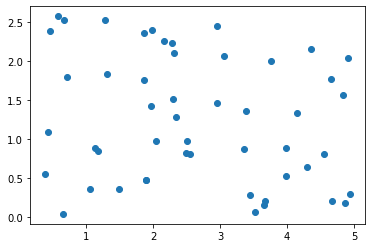

In [3]:
# x_1 feature with 50 random values in range (0, 5)
x_1 = torch.rand(50, 1) * 5
x_2 = torch.rand(50, 1) * 3

# scatter plot
plt.scatter(x_1.numpy(), x_2.numpy())

Calculate and subtract mean to get zero-mean.

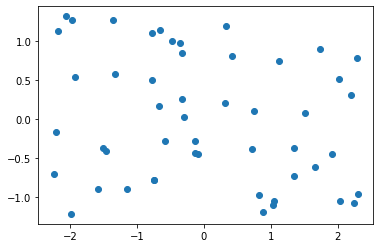

In [21]:
# subtract mean
x = torch.concat([x_1, x_2], dim=1)
x_new = x - x.mean(dim=0)

# scatter plot x_new
plt.scatter(x_new[:, 0].numpy(), x_new[:, 1].numpy())

Now normalize the variances

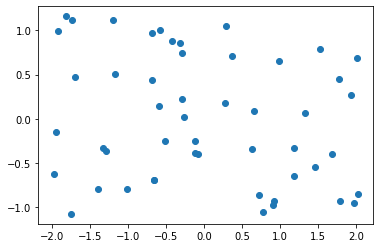

In [9]:
# normalize variance
x_new_normalized = x_new / torch.std(x_new, unbiased=False)

# scatter plot x_new_normalized
plt.scatter(x_new_normalized[:, 0].numpy(), x_new_normalized[:, 1].numpy())


And here is one more basic example where we reproduce the same results from this [scikit-learn tutorial](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [28]:
x = torch.tensor([[0.0, 0.0], [0.0, 0.0], [1.0, 1.0], [1.0, 1.0]])
x_new = x - x.mean(dim=0)
print(x.mean(dim=0))
x_new_normalized = x_new / torch.std(x_new, unbiased=False)
print(x_new_normalized)

tensor([0.5000, 0.5000])
tensor([[-1., -1.],
        [-1., -1.],
        [ 1.,  1.],
        [ 1.,  1.]])


### References

- [Wikipedia - Feature Scaling](https://en.wikipedia.org/wiki/Feature_scaling)
- [Wikipedia - Standard Deviation](https://en.wikipedia.org/wiki/Standard_deviation)
- [Normalizing Inputs by DeepLearning.AI](https://www.youtube.com/watch?v=FDCfw-YqWTE&ab_channel=DeepLearningAI)
- [How To Calculate the Mean and Standard Deviation — Normalizing Datasets in Pytorch](https://towardsdatascience.com/how-to-calculate-the-mean-and-standard-deviation-normalizing-datasets-in-pytorch-704bd7d05f4c)